In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Canada.xlsx",
                  sheet_name="Canada by Citizenship",
                  skiprows=20,
                  skipfooter=2)

In [3]:
df.drop( 'DevName', axis=1, inplace=True)

df.drop(['Type', 'Coverage', 'AREA', 'REG', 'DEV'], axis=1, inplace=True)

df.rename({'OdName':'Country', 'AreaName':'Continents', 'RegName':'Region'}, axis=1, inplace=True)

years = list(map(int, range(1980, 2014)))

df['Total'] = df[years].sum()

In [4]:

## SCATTER PLOT

df_scatter = pd.DataFrame(df[years].sum(axis=0))

df_scatter.index = map(int, df_scatter.index)

df_scatter.reset_index(inplace = True)

df_scatter.columns = ['years', 'total']

df_scatter.columns = ['years', 'total']

In [6]:
### Plotting the Graph
df_scatter.plot(kind='scatter',
               figsize=(20, 10),
               x='years',
               y='total',
               color='darkblue')

### for Regression Line

x = df_scatter['years']
y = df_scatter['total']

fit = np.polyfit(x, y, deg=1)

plt.plot(x, fit[0]*x + fit[1])
text = "Y = "+str(fit[0])+"X "+str(fit[1])
plt.annotate(text,  xy=(2004, 150000))
plt.show()

############################################################################
############################################################################
#################   For Denmark Norway Sweden ##############################
############################################################################
############################################################################

df.set_index('Country', inplace=True)

df_countries = pd.DataFrame(df.loc[['Sweden', 'Denmark', 'Norway'], years].sum(axis=0))

df_countries.reset_index(inplace=True)

df_countries.columns = ['years', 'total']

df_countries.plot(kind='scatter',
                 figsize=(20, 10),
               x='years',
               y='total',
               color='darkblue')

x = df_countries['years']
y = df_countries['total']

fit = np.polyfit(x, y, deg=1)

plt.plot(x, fit[0]*x+fit[1])
plt.annotate("Y = {0:.0f}X + {1:.0f}".format(fit[0], fit[1]), xy=(2005, 650))

In [13]:
fit[0]

-6.146982429335435

In [14]:
fit[1]

12628.15630252114

In [24]:
### Bubble graph

df_t = df[years].transpose()

df_t.index = map(int, df_t.index.values)
df_t.reset_index(inplace=True)
df_t.rename({'index':'Years'}, axis=1, inplace=True) 
brazil_norm = (df_t['Brazil']-min(df_t['Brazil']))/(max(df_t['Brazil'])-min(df_t['Brazil']))

In [47]:
argentina_norm = (df_t['Argentina']-min(df_t['Argentina']))/(max(df_t['Argentina'])-min(df_t['Argentina']))

In [42]:
brazil_norm

Year
0     0.032820
1     0.036467
2     0.025122
3     0.003647
4     0.006078
5     0.000000
6     0.030389
7     0.046191
8     0.106969
9     0.210697
10    0.210697
11    0.302674
12    0.379254
13    0.298217
14    0.176661
15    0.179092
16    0.184765
17    0.186791
18    0.162480
19    0.200972
20    0.289708
21    0.290519
22    0.249190
23    0.287277
24    0.318882
25    0.339951
26    0.425851
27    0.654781
28    0.813614
29    0.963938
30    1.000000
31    0.558347
32    0.612642
33    0.641815
Name: Brazil, dtype: float64

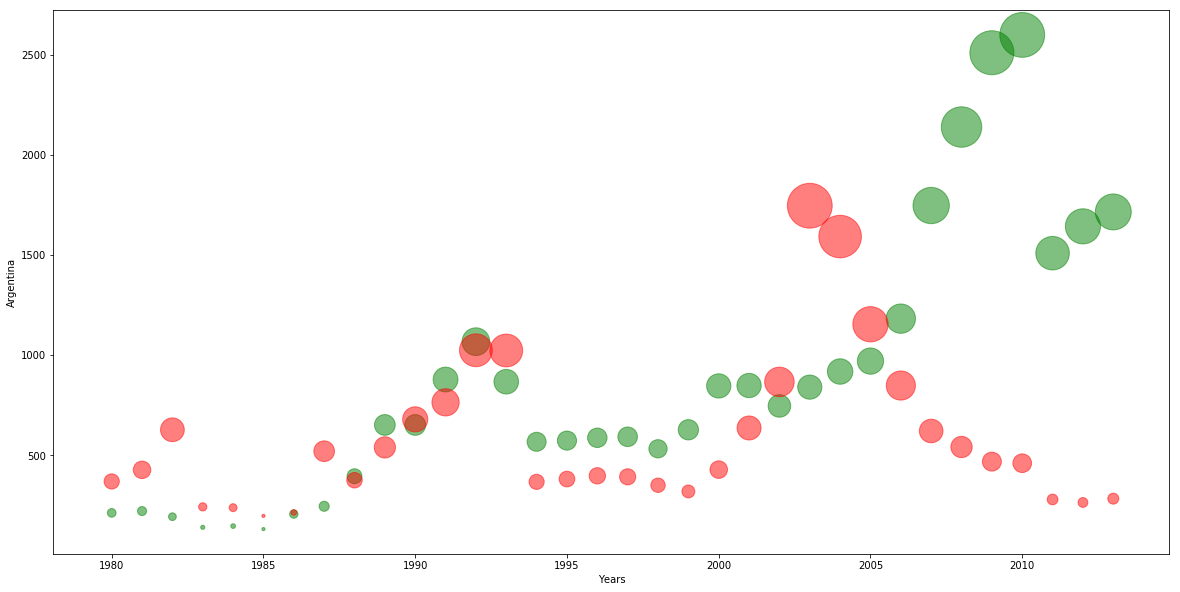

In [49]:
ax0 = df_t.plot(kind='scatter',
         x = 'Years',
         y = 'Brazil',
         s = brazil_norm*2000 + 10,
         alpha=.5,
         color="green",
         figsize=(20, 10))
ax1 = df_t.plot(kind='scatter',
         x = 'Years',
         y = 'Argentina',
         s = argentina_norm*2000 + 10,
         alpha=.5,
         ax = ax0,
         color="red",
         figsize=(20, 10))

In [123]:
################################## WORD CLOUD  ###########################
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

text = open('alice.txt', 'r').read()


stpwords = set(STOPWORDS)
stpwords.add("said")

alice_mask = np.array(Image.open("twitter_mask.png"))

alice_wc = WordCloud(background_color="white",
                    max_words = 2000,
                    mask=alice_mask,
                    stopwords = stpwords)

alice_mask

alice_wc.generate(text)

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(alice_wc, interpolation='bilinear')
plt.show()

In [141]:
### pracctice
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [142]:
stpwrd = set(STOPWORDS)

In [151]:
text = open('alice.txt', 'r').read()
tweet_mask = np.array(Image.open("twitter_mask.png"))
wc = WordCloud(
                background_color="black",
                stopwords=stpwrd,
                mask = tweet_mask
)
wc.generate(text)

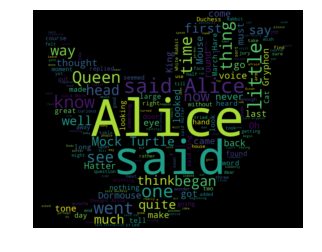

In [153]:
plt.axis('off')

plt.imshow(wc, interpolation='bilinear')


In [157]:
#################################################################################################################################
#################################################################################################################################
#################################################################################################################################
################################################******************FOLIUM***********##############################################

import folium

In [158]:
# define the world map
world_map = folium.Map()

# display world map
world_map